# Tiny ImageNet Classifier

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from nimrod.image.datasets import ImageDataset, ImageDataModule
from nimrod.models.core import lr_finder, train_one_cycle
from hydra.utils import instantiate
from omegaconf import OmegaConf
from rich import print

Seed set to 42
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


## Data

In [3]:
project_name = 'Tiny-ImageNet-Classifier'

In [4]:
dm = ImageDataModule(
    "slegroux/tiny-imagenet-200-clean",
    data_dir = "../data/image",
    batch_size = 512
)

[23:13:04] INFO - Init ImageDataModule for slegroux/tiny-imagenet-200-clean
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'transforms' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['transforms'])`.


In [5]:
dm.prepare_data()

[23:13:13] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split train
[23:13:13] INFO - loading dataset slegroux/tiny-imagenet-200-clean from split train
[23:13:24] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split test
[23:13:24] INFO - loading dataset slegroux/tiny-imagenet-200-clean from split test
[23:13:29] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split validation
[23:13:29] INFO - loading dataset slegroux/tiny-imagenet-200-clean from split validation


In [6]:
dm.setup()

In [14]:
print(f"""
    num_classes: {dm.num_classes}
    labels: {dm.label_names}
    img shape: {dm.train_ds[0][0].shape}
    img dim: {dm.dim}
"""
            
    )


num_classes: 200
    labels: ['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 
'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289', 
'n01944390', 'n01945685', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 
'n02074367', 'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 
'n02123394', 'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02190166', 'n02206856', 
'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 
'n02364673', 'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 
'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666196', 'n02669723', 'n02699494', 'n02730930', 
'n02769748', 'n02788148', 'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n02808440', 'n02814533', 
'n02814860', 'n02815834', 'n02823428', 'n02837789', 'n02841315', 'n02843684', 'n02883205', 'n02892201', 
'n02906734', 'n02909870', 'n02917067', 'n02927161', 'n02948072', 'n02950826', 'n02963159', 'n02977058', 
'n02988304', 'n02999410', 'n03014705', 'n03026506', 'n03042490', 'n03085013', 'n03089624', 'n03100240', 
'n03126707', 'n03160309', 'n03179701', 'n03201208', 'n03250847', 'n03255030', 'n03355925', 'n03388043', 
'n03393912', 'n03400231', 'n03404251', 'n03424325', 'n03444034', 'n03447447', 'n03544143', 'n03584254', 
'n03599486', 'n03617480', 'n03637318', 'n03649909', 'n03662601', 'n03670208', 'n03706229', 'n03733131', 
'n03763968', 'n03770439', 'n03796401', 'n03804744', 'n03814639', 'n03837869', 'n03838899', 'n03854065', 
'n03891332', 'n03902125', 'n03930313', 'n03937543', 'n03970156', 'n03976657', 'n03977966', 'n03980874', 
'n03983396', 'n03992509', 'n04008634', 'n04023962', 'n04067472', 'n04070727', 'n04074963', 'n04099969', 
'n04118538', 'n04133789', 'n04146614', 'n04149813', 'n04179913', 'n04251144', 'n04254777', 'n04259630', 
'n04265275', 'n04275548', 'n04285008', 'n04311004', 'n04328186', 'n04356056', 'n04366367', 'n04371430', 
'n04376876', 'n04398044', 'n04399382', 'n04417672', 'n04456115', 'n04465501', 'n04486054', 'n04487081', 
'n04501370', 'n04507155', 'n04532106', 'n04532670', 'n04540053', 'n04560804', 'n04562935', 'n04596742', 
'n04597913', 'n06596364', 'n07579787', 'n07583066', 'n07614500', 'n07615774', 'n07695742', 'n07711569', 
'n07715103', 'n07720875', 'n07734744', 'n07747607', 'n07749582', 'n07753592', 'n07768694', 'n07871810', 
'n07873807', 'n07875152', 'n07920052', 'n09193705', 'n09246464', 'n09256479', 'n09332890', 'n09428293', 
'n12267677']
    img shape: torch.Size([3, 64, 64])
    img dim: [64, 64]

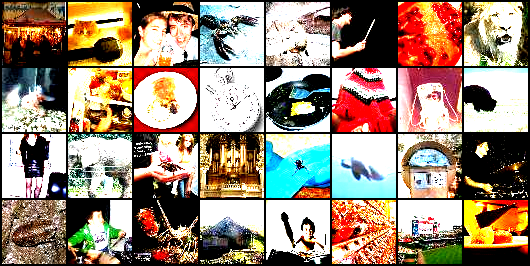

In [9]:
xb, yb = next(iter(dm.train_dataloader()))
dm.show_batch(xb[:32])

## ConvNet

Seed set to 42
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[23:00:37] INFO - ConvNetX: init
[23:00:37] INFO - Classifier: init
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
[23:00:41] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split train
[23:00:41] INFO - loading dataset slegroux/tiny-imagenet-200-clean from split train
[23:00:51] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split test
[23:00:51] INFO - load

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.022387211385683406
Restoring states from the checkpoint path at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_bf599077-9153-42be-84f5-cebba1683803.ckpt
Restored all states from the checkpoint at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_bf599077-9153-42be-84f5-cebba1683803.ckpt


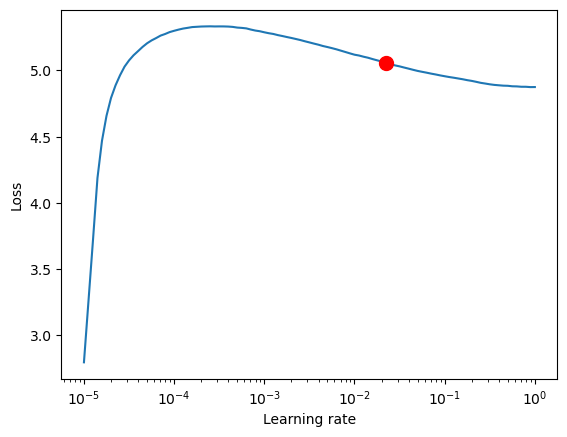

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[23:01:15] INFO - ConvNetX: init
[23:01:15] INFO - Classifier: init


Suggested learning rate: 0.022387211385683406


==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
==========================================================================================
ConvNet                                  [512, 200]                --
├─Sequential: 1-1                        [512, 200]                --
│    └─ConvLayer: 2-1                    [512, 16, 64, 64]         --
│    │    └─Sequential: 3-1              [512, 16, 64, 64]         --
│    │    │    └─Conv2d: 4-1             [512, 16, 64, 64]         432
│    │    │    └─BatchNorm2d: 4-2        [512, 16, 64, 64]         32
│    │    │    └─ReLU: 4-3               [512, 16, 64, 64]         --
│    └─ConvLayer: 2-2                    [512, 32, 32, 32]         --
│    │    └─Sequential: 3-2              [512, 32, 32, 32]         --
│    │    │    └─Conv2d: 4-4             [512, 32, 32, 32]         4,608
│    │    │    └─BatchNorm2d: 4-5        [512, 32, 32, 32]         64
│    │    │    └─ReLU: 4-6               [512, 32, 32, 32]         --
│    └─ConvLayer: 2-3                    [512, 64, 16, 16]         --
│    │    └─Sequential: 3-3              [512, 64, 16, 16]         --
│    │    │    └─Conv2d: 4-7             [512, 64, 16, 16]         18,432
│    │    │    └─BatchNorm2d: 4-8        [512, 64, 16, 16]         128
│    │    │    └─ReLU: 4-9               [512, 64, 16, 16]         --
│    └─ConvLayer: 2-4                    [512, 128, 8, 8]          --
│    │    └─Sequential: 3-4              [512, 128, 8, 8]          --
│    │    │    └─Conv2d: 4-10            [512, 128, 8, 8]          73,728
│    │    │    └─BatchNorm2d: 4-11       [512, 128, 8, 8]          256
│    │    │    └─ReLU: 4-12              [512, 128, 8, 8]          --
│    └─ConvLayer: 2-5                    [512, 256, 4, 4]          --
│    │    └─Sequential: 3-5              [512, 256, 4, 4]          --
│    │    │    └─Conv2d: 4-13            [512, 256, 4, 4]          294,912
│    │    │    └─BatchNorm2d: 4-14       [512, 256, 4, 4]          512
│    │    │    └─ReLU: 4-15              [512, 256, 4, 4]          --
│    └─ConvLayer: 2-6                    [512, 128, 2, 2]          --
│    │    └─Sequential: 3-6              [512, 128, 2, 2]          --
│    │    │    └─Conv2d: 4-16            [512, 128, 2, 2]          294,912
│    │    │    └─BatchNorm2d: 4-17       [512, 128, 2, 2]          256
│    │    │    └─ReLU: 4-18              [512, 128, 2, 2]          --
│    └─ConvLayer: 2-7                    [512, 200, 1, 1]          --
│    │    └─Sequential: 3-7              [512, 200, 1, 1]          --
│    │    │    └─Conv2d: 4-19            [512, 200, 1, 1]          230,400
│    │    │    └─BatchNorm2d: 4-20       [512, 200, 1, 1]          400
│    │    │    └─ReLU: 4-21              [512, 200, 1, 1]          --
│    └─Flatten: 2-8                      [512, 200]                --
==========================================================================================
Total params: 919,072
Trainable params: 919,072
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 11.29
==========================================================================================
Input size (MB): 25.17
Forward/backward pass size (MB): 1046.02
Params size (MB): 3.68
Estimated Total Size (MB): 1074.86
==========================================================================================

wandb: Currently logged in as: slegroux. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


[23:01:21] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[23:01:21] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | ConvNet            | 919 K  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0      | train
8 | val_acc_best | MaxMetric          | 0      | train
------------------------------------------------------------
919 K     Trainable params
0         Non-trainable params
919 K     Total params
3.676     Total estimated model params size (MB)
46        Modules in train mode
0         Modules in eval m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.33414584398269653    │
│         test/loss         │    2.9066576957702637     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆██████
lr-AdamW,▁▁▁▂▃▄▄▇▇▇█████▇▇▇▆▆▆▅▅▄▄▄▄▄▄▃▃▃▃▂▂▂▁▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▃▄▆█
train/acc_step,▁▁▂▂▂▂▃▃▃▃▃▃▄▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▅▆▆▆▇▆▆████▇
train/loss_epoch,█▅▄▃▁
train/loss_step,██▇▆▇▆▅▅▅▆▅▅▅▅▄▄▄▄▄▄▄▂▂▃▂▃▂▂▃▃▂▂▁▁▁▁▂▂▁▂
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█
val/acc,▁▂▆██
val/acc_best,▁▂▆██


In [25]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True
exp_logger = 'wandb'

cfg_model = OmegaConf.load('../config/model/image/convnetx.yaml')
# feats_dim = [1, 8, 16, 32, 16]
# feats_dim = [1, 4, 8, 16, 8]
# feats_dim = [1, 8, 16, 32, 64, 128]
# feats_dim = [3, 8, 16, 32, 64, 128, 64]
feats_dim = [3, 16, 32, 64, 128, 256, 128]
cfg_model.nnet.n_features = feats_dim
cfg_model.num_classes = dm.num_classes
model = instantiate(cfg_model) #partial

tags = [
    f"n_features:{feats_dim}",
    f"bs:{dm.batch_size}",
    f"epochs:{N_EPOCHS}",
    ]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    logger=exp_logger
    )

## ResNet

In [ ]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True

# exp_logger = 'tensorboard'
exp_logger = 'wandb'

cfg_model = OmegaConf.load('../config/model/image/resnetx.yaml')
cfg_model.num_classes=dm.num_classes
# feats_dim = [1, 8, 16, 32, 64]
# feats_dim = [1, 4, 8, 16, 8]
# feats_dim = [1, 16, 32, 64, 32]
# feats_dim = [3, 16, 32, 64, 128, 64]
feats_dim = [3, 16, 32, 64, 128, 256, 128]
cfg_model.nnet.n_features = feats_dim
model = instantiate(cfg_model) #partial

tags = [f"n_features:{feats_dim}", f"bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    logger=exp_logger
    )